# 연습문제2 풀이

### 패키지 설치

In [1]:
from pca import pca
from pandas import read_excel, DataFrame, merge, melt
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler

import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))))
from helper import my_ols, scalling, get_best_features

# 문제 1

## 데이터 가져오기

In [2]:
df = read_excel("https://data.hossam.kr/E04/diabetes.xlsx")
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220


## 독립변수만 추출

In [3]:
# 종속변수 drop
x_train = df.drop(['target'], axis=1)
x_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


## 전체 요인에 대한 회귀분석

In [4]:
xnames = list(df.columns)
xnames.remove("target")

model1 = my_ols(df, y='target', x=xnames)
model1

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']


### 요약 결과

In [5]:
model1.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           3.83e-62
Time:                        10:30:06   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0099     59.749     -0.168      0.867    -127.446     107.426
sex         -239.8156     61.222     -3.917      0.000    -360.147    -119.484
bmi          519.8459     66.533      7.813      0.000     389.076     650.616
bp           324.3846     65.422      4.958      0.000     195.799     452.970
s1          -792.1756    416.680     -1.901      0.058   -1611.153      26.802
s2           476.7390    339.030      1.406      0.160    -189.620    1143.098
s3           101.0433    212.531      0.475      0.635    -316.684     518.770
s4           177.0632    161.476      1.097      0.273    -140.315     494.441
s5           751.2737    171.900      4.370      0.000     413.407    1089.140
s6            67.6267     65.984      1.025      0.306     -62.064     197.318
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 결과표

In [6]:
model1.table

B     표준오차  β        t   유의확률        VIF
종속변수   독립변수                                                  
target age    -10.0099   59.749  0  -0.168*  0.867   1.217315
       sex   -239.8156   61.222  0  -3.917*  0.000   1.283075
       bmi    519.8459   66.533  0   7.813*  0.000   1.532949
       bp     324.3846   65.422  0   4.958*  0.000   1.468583
       s1    -792.1756  416.680  0  -1.901*  0.058  59.257108
       s2     476.7390  339.030  0   1.406*  0.160  39.213144
       s3     101.0433  212.531  0   0.475*  0.635  15.403044
       s4     177.0632  161.476  0   1.097*  0.273   8.893714
       s5     751.2737  171.900  0   4.370*  0.000  10.125073
       s6      67.6267   65.984  0   1.025*  0.306   1.485021

### 예측값 생성

In [7]:
y1 = model1.fit.predict(x_train)
y1

0      206.116677
1       68.071033
2      176.882790
3      166.914458
4      128.462258
          ...    
437    193.017565
438    101.055814
439    121.226681
440    211.858945
441     53.447275
Length: 442, dtype: float64

### 차원 축소 적용

#### PCA 분석

In [8]:
pca_model = pca(n_components=len(x_train.columns))
fit = pca_model.fit_transform(x_train)
fit['topfeat']

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


,PC,feature,loading,type
0,PC1,s4,0.428834,best
1,PC2,s1,0.573027,best
2,PC3,bp,0.513571,best
3,PC4,sex,-0.679860,best
4,PC5,age,-0.686876,best
5,PC6,s6,0.805066,best
6,PC7,s5,0.647302,best
7,PC8,bp,-0.477360,best
8,PC9,s4,0.773817,best
9,PC10,s1,0.709775,best


#### 시각화를 통한 기여도 확인

종속변수에 영향을 크게 미치는 요소를 찾기 위해 보통 70~80% 지점까지의 변수를 취함

여기서는 특정 변수의 value를 역순으로 정렬 후 시각화한 경우 급하강 직전 변수를 취한다

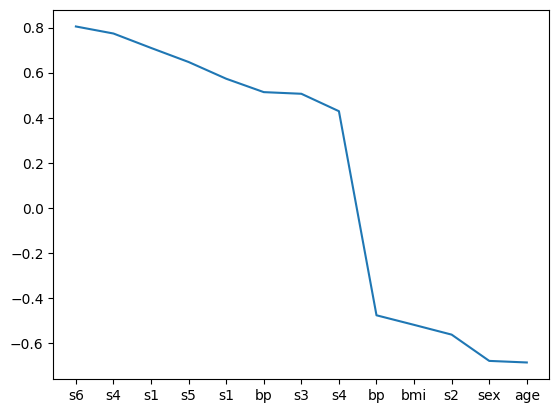

In [9]:
pca_df = fit['topfeat']
pca_df.sort_values('loading', ascending=False, inplace=True)
pca_df.set_index('feature', inplace=True)
pca_df['loading']

xlabel = pca_df['loading'].index
y = pca_df['loading'].values
x = list(range(0, len(y)))
sb.lineplot(x=x, y=y)
plt.xticks(x, xlabel, rotation=0)
plt.show()
plt.close()

#### 선정된 요인(변수)을 사용하여 회귀분석 수행

변수 확인, 설정은 수동(중복없이)

In [10]:
model2 = my_ols(df, y='target', x=['s6','s4','s1','s5','bp','s3'])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']


#### 요약 결과

In [11]:
model2.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     51.55
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           7.70e-48
Time:                        10:30:07   Log-Likelihood:                -2428.5
No. Observations:                 442   AIC:                             4871.
Df Residuals:                     435   BIC:                             4900.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.823     53.899      0.000     146.586     157.681
s6           126.4813     70.640      1.790      0.074     -12.357     265.320
s4            35.9208    174.587      0.206      0.837    -307.218     379.060
s1          -138.8137    123.913     -1.120      0.263    -382.357     104.729
s5           658.9295     84.467      7.801      0.000     492.915     824.944
bp           387.7776     67.065      5.782      0.000     255.965     519.590
s3          -238.8947    149.211     -1.601      0.110    -532.159      54.369
==============================================================================
Omnibus:                        5.904   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.522
Skew:                           0.222   Prob(JB):                       0.0632
Kurtosis:                       2.680   Cond. No.                         87.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

설명력(R-squared 값)이 다소 떨어짐

#### 결과표

In [12]:
y2 = model2.fit.predict(x_train)
y2

0      187.914775
1       67.214133
2      162.506693
3      159.833966
4      131.053881
          ...    
437    204.313806
438    120.827759
439    140.662926
440    184.205295
441     63.602616
Length: 442, dtype: float64

### 두 가지 모델의 결과 비교

In [13]:
rdf = DataFrame({
    's6': df['s6'],
    'y': df['target'],
    'y1': y1,
    'y2': y2
})

rdf

,s6,y,y1,y2
0,-0.017646,151,206.116677,187.914775
1,-0.092204,75,68.071033,67.214133
2,-0.025930,141,176.882790,162.506693
3,-0.009362,206,166.914458,159.833966
4,-0.046641,135,128.462258,131.053881
...,...,...,...,...
437,0.007207,178,193.017565,204.313806
438,0.044485,104,101.055814,120.827759
439,0.015491,132,121.226681,140.662926
440,-0.025930,220,211.858945,184.205295


melt 함수를 사용해 데이터 배치를 변경, 가독성을 높일 수 있음. (형식은 카테고리로 변경)

적용 전

| 이름 | 아침 | 점심 | 저녁 |
| -- | -- | -- | -- |
| A | 100m | 200m | 300m |

적용 후

| A  | 아침 | 100m |
| -- | -- | -- |
| A | 점심 | 200m |
| A | 저녁 | 300m |

id_vars=이름, value_vars=아침,점심,저녁

In [14]:
mdf1 = melt(rdf, id_vars=['s6'], value_vars=['y', 'y1'])
mdf1

,s6,variable,value
0,-0.017646,y,151.000000
1,-0.092204,y,75.000000
2,-0.025930,y,141.000000
3,-0.009362,y,206.000000
4,-0.046641,y,135.000000
...,...,...,...
879,0.007207,y1,193.017565
880,0.044485,y1,101.055814
881,0.015491,y1,121.226681
882,-0.025930,y1,211.858945


In [15]:

mdf2 = melt(rdf, id_vars=['s6'], value_vars=['y', 'y2'])
mdf2

,s6,variable,value
0,-0.017646,y,151.000000
1,-0.092204,y,75.000000
2,-0.025930,y,141.000000
3,-0.009362,y,206.000000
4,-0.046641,y,135.000000
...,...,...,...
879,0.007207,y2,204.313806
880,0.044485,y2,120.827759
881,0.015491,y2,140.662926
882,-0.025930,y2,184.205295


In [16]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

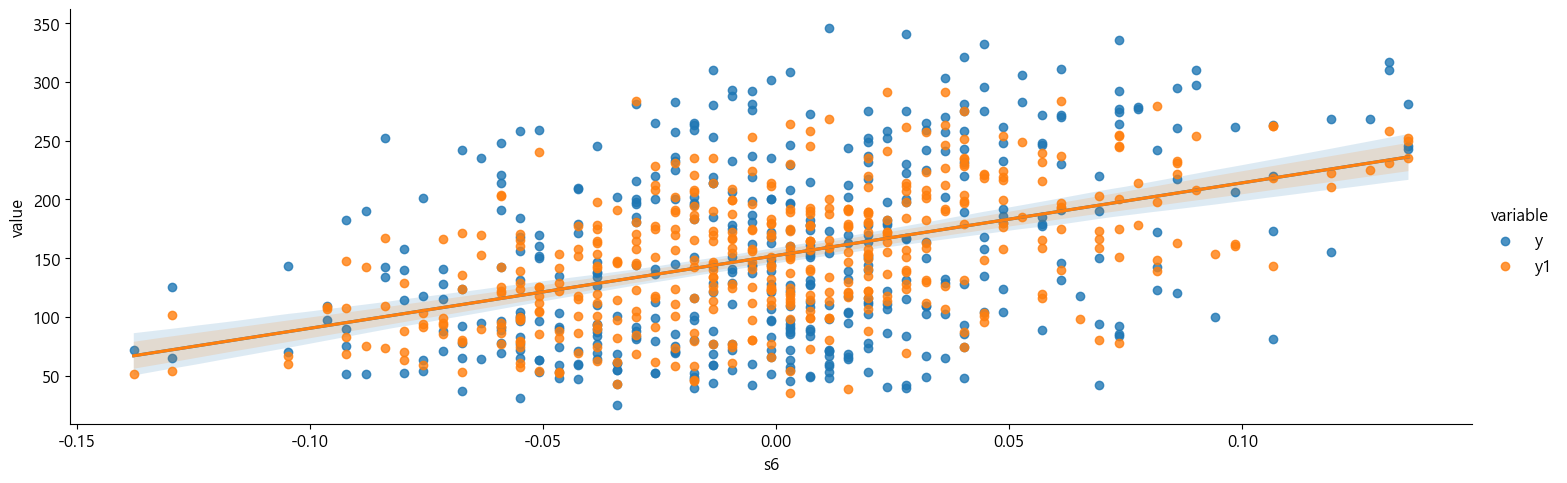

In [17]:
sb.lmplot(data=mdf1, x="s6", y="value", hue="variable", height=5, aspect=3)
plt.show()
plt.close()

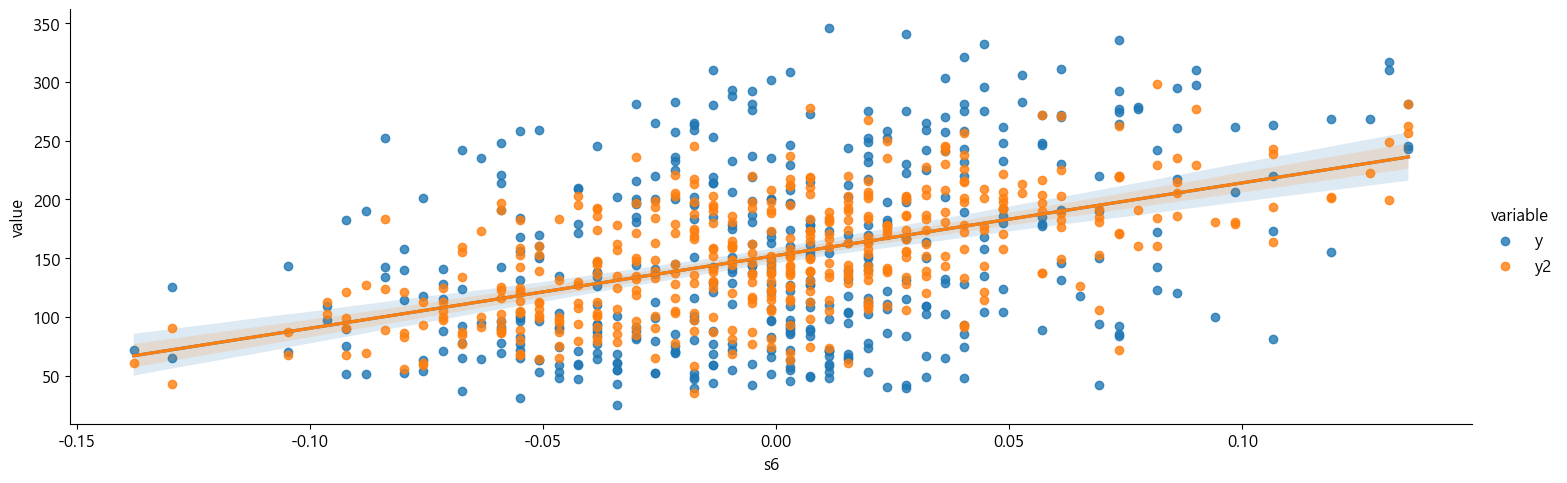

In [18]:
sb.lmplot(data=mdf2, x="s6", y="value", hue="variable", height=5, aspect=3)
plt.show()
plt.close()

# 문제2

## 데이터 가져오기

In [19]:
df = read_excel("https://data.hossam.kr/E04/manhattan.xlsx")
df

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


## 데이터 전처리

### 명목형 변수 확인

neighborhood의 값의 종류가 지나치게 많으므로 이 변수는 제외

In [20]:
df['neighborhood'].value_counts()

neighborhood
Upper West Side        579
Upper East Side        500
Midtown East           460
Midtown West           314
Financial District     268
Chelsea                182
Flatiron               132
Midtown                119
Tribeca                119
East Village           108
Battery Park City      104
Midtown South           85
Central Harlem          82
West Village            67
Greenwich Village       66
Gramercy Park           61
Soho                    58
Washington Heights      54
East Harlem             41
Lower East Side         41
Central Park South      23
Hamilton Heights        16
Morningside Heights     13
Inwood                  12
Nolita                   9
Chinatown                8
Roosevelt Island         5
Long Island City         4
Stuyvesant Town/PCV      3
Little Italy             3
West Harlem              2
Manhattanville           1
Name: count, dtype: int64

borough 값의 종류가 없으므로 이 변수도 제외

In [21]:
df['borough'].value_counts()

borough
Manhattan    3539
Name: count, dtype: int64

불필요한 변수 제거

In [22]:
df2 = df.drop(['neighborhood', 'borough'], axis=1)
df2.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1


### 데이터 표준화

In [23]:
x_train_std_df, y_train_std_df = scalling(df2, 'rent')

In [24]:
x_train_std_df.head()

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,-1.397410,-0.611790,-0.962011,0.730862,-0.904097,-0.888763,1.21585,2.336243,-0.436784,-0.625393,1.546964,2.094423,-0.241482,2.171931
1,0.669863,1.056257,2.218694,-0.176116,-0.995343,1.117593,-0.82247,-0.428038,-0.436784,-0.625393,-0.646428,-0.477459,-0.241482,-0.460420
2,-0.363774,-0.611790,-0.049651,-0.538908,3.566974,-0.584000,-0.82247,2.336243,-0.436784,1.598995,1.546964,2.094423,-0.241482,-0.460420
3,-0.363774,-0.611790,0.073811,-0.357512,-0.356619,-0.533206,-0.82247,-0.428038,-0.436784,1.598995,1.546964,2.094423,-0.241482,2.171931
4,0.669863,1.056257,8.077886,-0.357512,-0.721604,2.133470,-0.82247,-0.428038,-0.436784,1.598995,1.546964,2.094423,-0.241482,2.171931


In [25]:
y_train_std_df.head()

,rent
0,-0.818669
1,2.011480
2,-0.202044
3,-0.108760
4,3.908786


### PCA

#### 주성분 분석 시행

In [26]:
feature, topfeat_df = get_best_features(x_train_std_df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [14] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [12] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [14] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[12]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [27]:
topfeat_df

,PC,feature,loading,type
0,PC1,has_elevator,0.453207,best
1,PC2,size_sqft,0.573482,best
2,PC3,building_age_yrs,-0.638744,best
3,PC4,has_patio,0.743626,best
4,PC5,min_to_subway,0.624977,best
5,PC6,min_to_subway,0.672089,best
6,PC7,no_fee,0.666304,best
7,PC8,building_age_yrs,0.673353,best
8,PC9,has_roofdeck,0.801673,best
9,PC10,has_dishwasher,-0.650467,best


In [28]:
feature

['building_age_yrs',
 'has_dishwasher',
 'has_gym',
 'has_elevator',
 'has_patio',
 'min_to_subway',
 'no_fee',
 'has_roofdeck',
 'size_sqft']

In [29]:
mdf = merge(x_train_std_df, y_train_std_df, left_index=True, right_index=True)
ols_result = my_ols(mdf, y='rent', x=feature)
ols_result.summary

['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym', 'rent']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     1221.
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:31:59   Log-Likelihood:                -2519.3
No. Observations:                3539   AIC:                             5059.
Df Residuals:                    3529   BIC:                             5120.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -9.346e-17      0.008  -1.13e-14      1.000      -0.016       0.016
building_age_yrs    -0.1476      0.009    -16.969      0.000      -0.165      -0.131
has_dishwasher       0.0008      0.009      0.088      0.930      -0.017       0.019
has_gym          -3.013e-05      0.012     -0.003      0.998      -0.023       0.023
has_elevator         0.0036      0.012      0.310      0.756      -0.019       0.026
has_patio            0.0015      0.008      0.180      0.857      -0.015       0.018
min_to_subway       -0.0251      0.008     -2.970      0.003      -0.042      -0.009
no_fee              -0.0095      0.009     -1.086      0.278      -0.027       0.008
has_roofdeck         0.0040      0.010      0.383      0.701      -0.016       0.024
size_sqft            0.8594      0.008    102.273      0.000       0.843       0.876
==============================================================================
Omnibus:                      885.741   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11081.768
Skew:                           0.831   Prob(JB):                         0.00
Kurtosis:                      11.508   Cond. No.                         2.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 실제 임대료와 예측된 임대료 비교

In [30]:
rdf = DataFrame({
    'x': mdf['building_age_yrs'],
    'rent': mdf['rent'],
    'y': ols_result.fit.predict(x_train_std_df)
})

rdf

,x,rent,y
0,-0.888763,-0.818669,-0.709297
1,1.117593,2.011480,1.749272
2,-0.584000,-0.202044,0.081194
3,-0.533206,-0.108760,0.164098
4,2.133470,3.908786,6.649321
...,...,...,...
3534,-0.914160,-0.293747,-0.584661
3535,-1.091938,0.485729,0.252526
3536,1.117593,-1.087770,-1.388796
3537,-0.964953,-0.526167,-0.387902


In [31]:
melt_df = melt(rdf, id_vars=['x'], value_vars=['rent','y'])
melt_df

,x,variable,value
0,-0.888763,rent,-0.818669
1,1.117593,rent,2.011480
2,-0.584000,rent,-0.202044
3,-0.533206,rent,-0.108760
4,2.133470,rent,3.908786
...,...,...,...
7073,-0.914160,y,-0.584661
7074,-1.091938,y,0.252526
7075,1.117593,y,-1.388796
7076,-0.964953,y,-0.387902


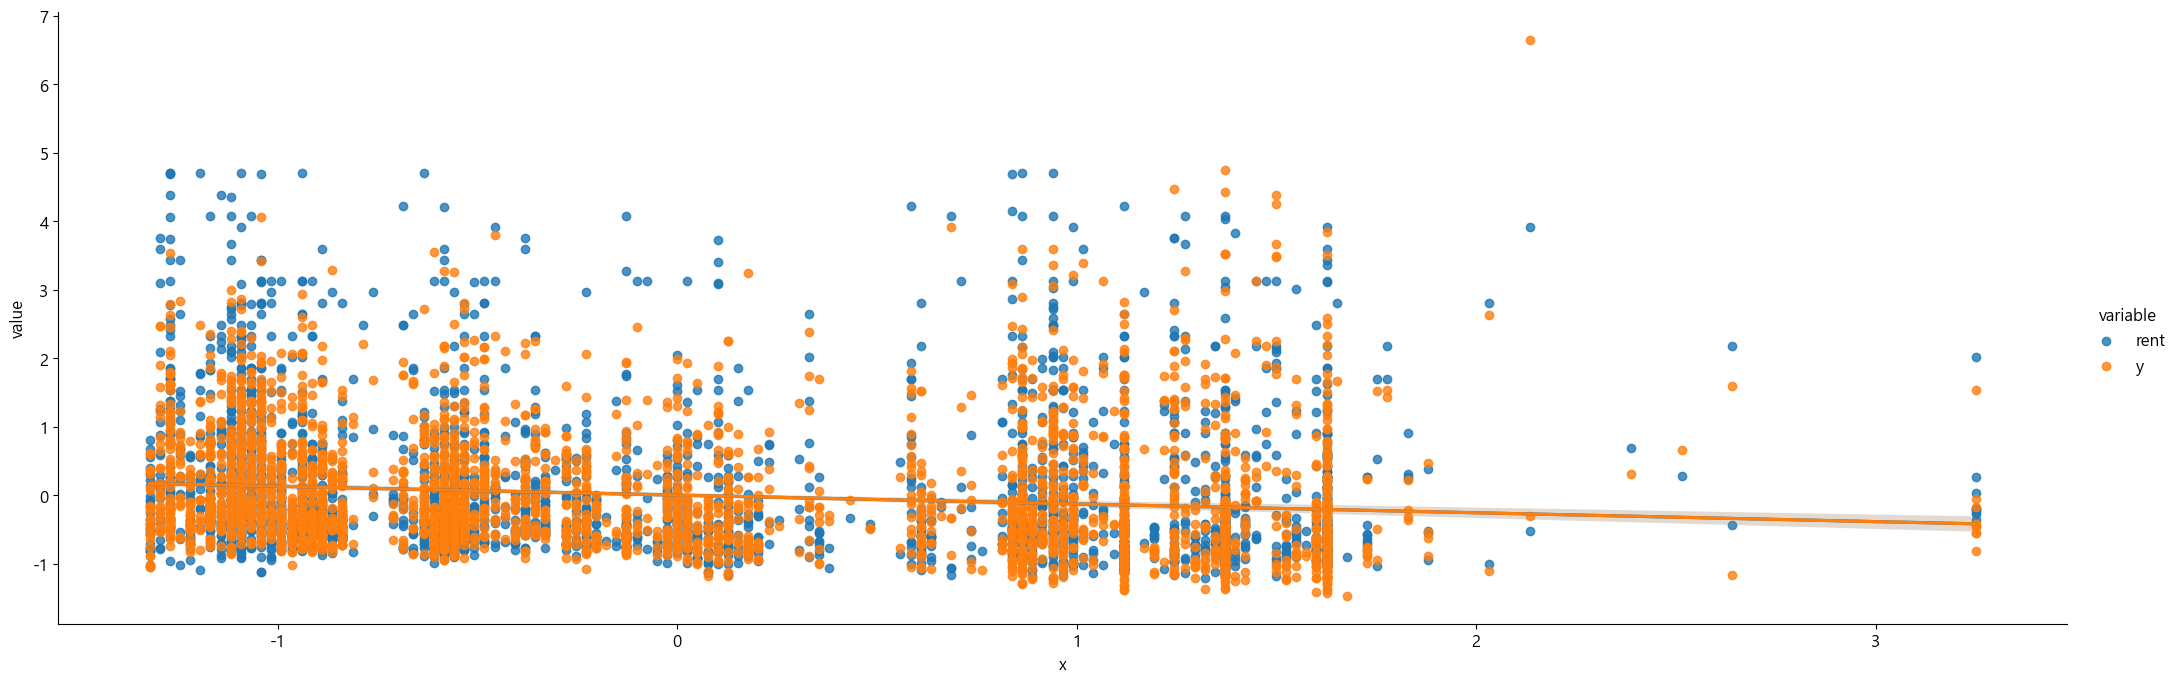

In [32]:
sb.lmplot(data=melt_df, x="x", y="value", hue="variable", height=7, aspect=3)
plt.show()
plt.close()